<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/03_StatisticsUsingPython/blob/main/04_MoreAboutStatisticalTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics Using Python: Statistical tests

In this course, we will delve further into statistical tests. First, we will analyze a dataset, and then ask questions and raise hypothesis. Then, we will use tests to answer such hypothesis. We will also show how to create confidence intervals to our samples, and how to compare two samples. 

## Importing and understanding our dataset

For that end, we will use data from Movie Lens and The Movie Database (TMDb), which stores movie ratings for many different movies. So, let's import the data:

In [3]:
import pandas as pd

tmdb5000 = pd.read_csv('tmdb_5000_movies.csv')

tmdb5000.head( )

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


So, our tmdb5000 dataset has information about:

* Budget
* Genre
* Homepage
* ID
* Keywords
* Original language
* Original title
* Overview
* Popularity
* Production companies
* Production countries
* Release data
* Revenue
* Runtime
* Spoken languages
* Status
* Tagline
* Title
* Vote_average
* Vote count

So, in this course, we will be worried about the vote_average and vote count. Let's see more about the vote_average attribute:

In [4]:
tmdb5000['vote_average'].describe( )

count    2434.000000
mean        6.167379
std         0.870716
min         0.000000
25%         5.700000
50%         6.200000
75%         6.700000
max         9.300000
Name: vote_average, dtype: float64

So, our votes go from 0 to 10, and the average grade is 6.09. Let's plot a histogram for the vote_average:

$k = 1 + \frac{10}{3} \, \log_{10} n$

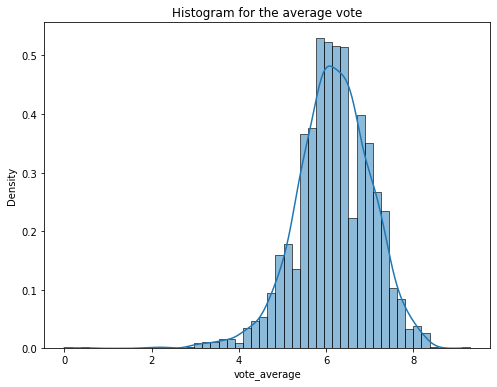

In [5]:
import seaborn as sns
import numpy as np

# k = int(round(1 + (10/3)*np.log10(tmdb5000.shape[0]), 0))

ax = sns.histplot(tmdb5000.vote_average, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the average vote")
ax.figure.set_size_inches(8,6)

Using the *kde* parameter and choosing a density plot, we can see that the parameter distribution is similar to a Normal (bell-shaped). Let's draw a boxplot, which allows us to see some separating measures:

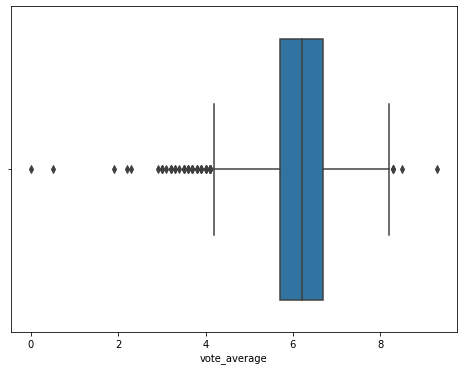

In [6]:
ax = sns.boxplot(x = tmdb5000.vote_average)
ax.figure.set_size_inches(8,6)

Now, let's analyze our plots. Isn't it stange that so many movies have a vote average of 0? It means that **no one** gave a grade higher than 0 to these movies. 

Let's try to analyze these cases:

In [7]:
tmdb5000.query('vote_average == 0')[['vote_average', 'vote_count']].head(10)

,vote_average,vote_count
1464,0.0,0.0


We can actually see that, in a lot of these movies, actually no one voted! Than, the vote average ended up being 0.0. So, let's clean our dataset, taking the observations with very few votes out of our sample:

In [8]:
tmdb5000 = tmdb5000.query('vote_count > 10').reset_index(drop = True)

Now, let's analyze again our variable vote_average:

In [9]:
tmdb5000.vote_average.describe( )

count    2413.000000
mean        6.177994
std         0.843255
min         1.900000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.500000
Name: vote_average, dtype: float64

Now, the minimum vote average is 1.9, and the maximum is 8.5. That occurs because, since we are taking the mean of $x$ votes, it is very unlikely that everyone agrees on the rating of a movie: some think that it is good, some think that it is bad. Thus, extremes are much more rare. Let's draw the histogram again:

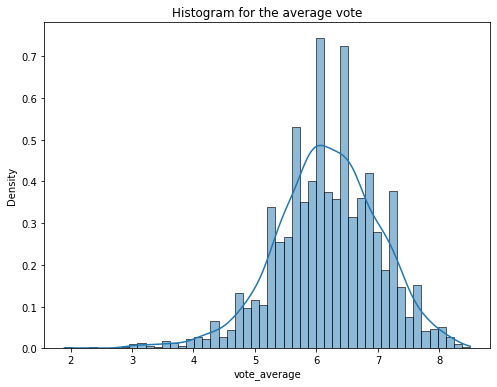

In [10]:
ax = sns.histplot(tmdb5000.vote_average, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the average vote")
ax.figure.set_size_inches(8,6)

Our plot looks a lot like a Normal curve. However, it is slightly left-skewed. To check if this data comes from a Normal distribution we can perform a normality test:

In [11]:
from scipy.stats import normaltest

significance = 0.05

normaltest(tmdb5000.vote_average)

NormaltestResult(statistic=103.99679676768935, pvalue=2.6144630844940783e-23)

Since our p_value is lower than the test significance, we can not say that this distribution comes from a Normal!

Ok, now that we checked the data from tmdb5000 and made some cleaning, let's check the data from movielens:

In [12]:
movielens = pd.read_csv('ratings.csv')
movielens

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Here, our data has a different format: we have the movie id, and the rating given by the user to that movie. So, let's get the average votes for each movie:

In [13]:
movielens_agg = pd.DataFrame( )

movielens_agg['vote_average'] = movielens.groupby('movieId')['rating'].mean( )
movielens_agg['vote_count'] = movielens.groupby('movieId')['rating'].count( )
movielens_agg

,vote_average,vote_count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49
...,...,...
193581,4.000000,1
193583,3.500000,1
193585,3.500000,1


Once again, let's plot a histogram:

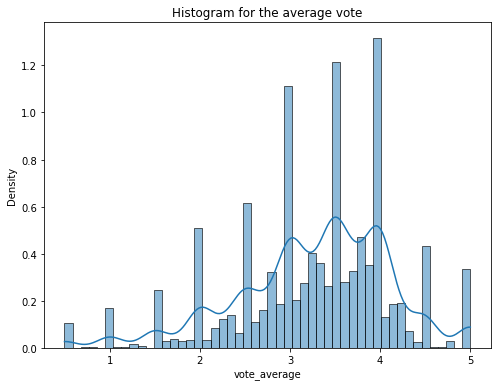

In [14]:
ax = sns.histplot(movielens_agg.vote_average, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the average vote")
ax.figure.set_size_inches(8,6)

This time, our plot follows a very differentcurve. Note that we have a peak in every step-size (0, 1, 1.5, 2, 2.5,..., 5). This may be due to considering data with a very low number of votes. So, let's clean our dataset:

In [15]:
movielens_agg = movielens_agg.query('vote_count > 10')
movielens_agg

,vote_average,vote_count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
5,3.071429,49
6,3.946078,102
...,...,...
174055,3.423077,13
176371,3.805556,18
177765,3.538462,13


Now, let's draw our histogram once again:

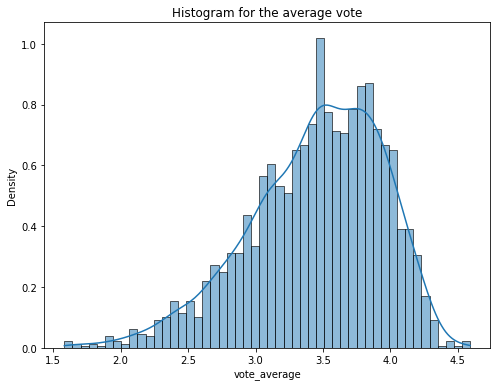

In [16]:
ax = sns.histplot(movielens_agg.vote_average, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the average vote")
ax.figure.set_size_inches(8,6)

Great! Our distribution looks much more smooth. Let's draw a boxplot for this result:

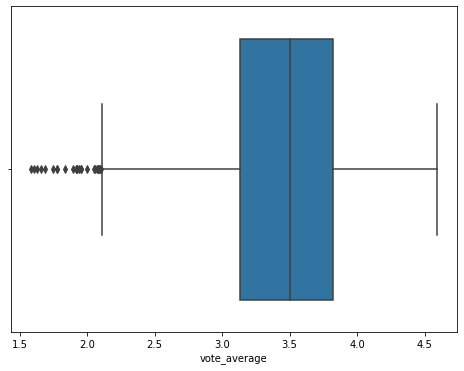

In [17]:
ax = sns.boxplot(x = movielens_agg.vote_average)
ax.figure.set_size_inches(8,6)

In some cases, we want to see how a given movie fares when compared to all others. For instance, how a movie with average 4.2 is compared to the others? Which percentile does it represent? 

This information can be found using a cumulative distribution. We can draw a cumulative histogram by:

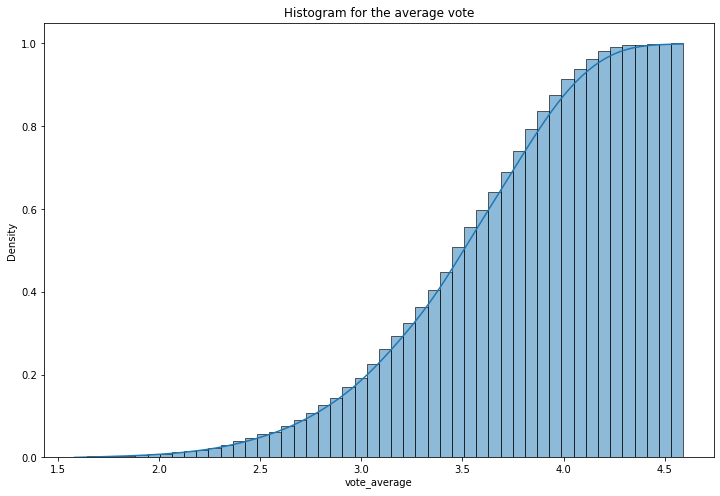

In [18]:
ax = sns.histplot(movielens_agg.vote_average, bins = 50, stat = 'density', kde = True, cumulative = True)
ax.set_title("Histogram for the average vote")
ax.figure.set_size_inches(12,8)

Here we can see, for instace, that 50% of the movies has less than vote_average = 3.5. Also, we can see that a movie with vote_average = 4.2 is among the top 10%. The cumulative histogram gives us a lot of important information for comparison purposes.

Information about the quantile can also be found using:

In [19]:
movielens_agg.vote_average.quantile(0.5)

3.5

In [20]:
movielens_agg.vote_average.quantile(0.9)

4.027027027027027

## Visualizing other aspects

So, we have visualized our empirical data distribution. Now, let's try to analyze other features. Let's plot the distribution for the vote_count:

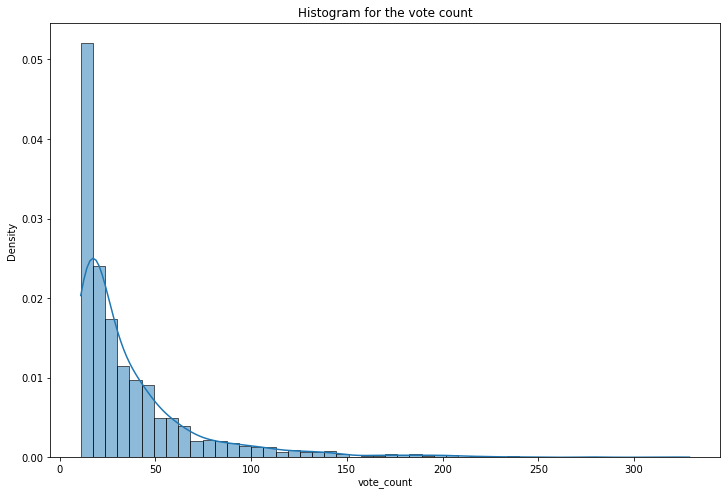

In [21]:
ax = sns.histplot(movielens_agg.vote_count, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the vote count")
ax.figure.set_size_inches(12,8)

This distribution is very different from a Normal distribution. In fact, it looks a lot like an exponential distribution, where the frequency for a lower vote_count is higher. 

This makes sense, since most of the movies will have a very low number of vote_count. This can also be seen when we analyze the tmdb5000 dataset:

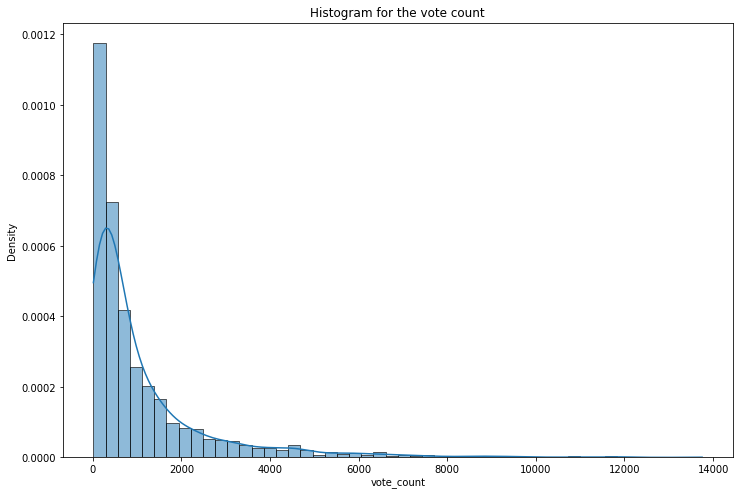

In [22]:
ax = sns.histplot(tmdb5000.vote_count, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the vote count")
ax.figure.set_size_inches(12,8)

Now, let's look for the distribution over the budget of each movie. Here, we will make a query to exclude those with budget = 0.

In [23]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb_budget_clean = tmdb.query('budget > 0')

Now, let's draw our histogram:

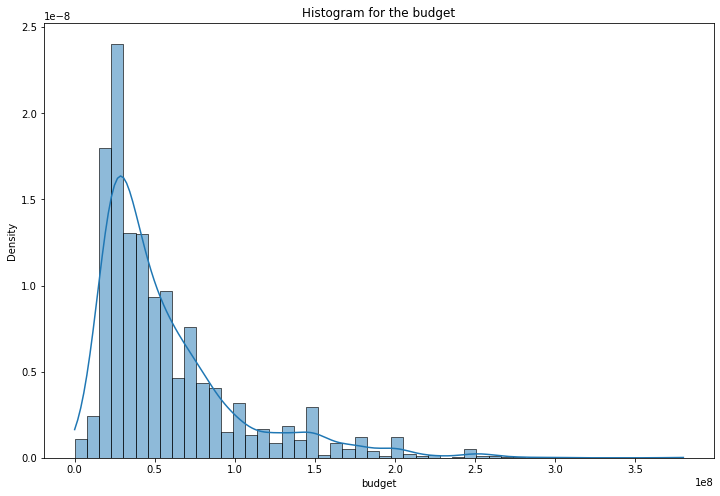

In [24]:
ax = sns.histplot(tmdb_budget_clean.budget, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the budget")
ax.figure.set_size_inches(12,8)

Again, this looks a lot like an exponential distribution. What about popularity?

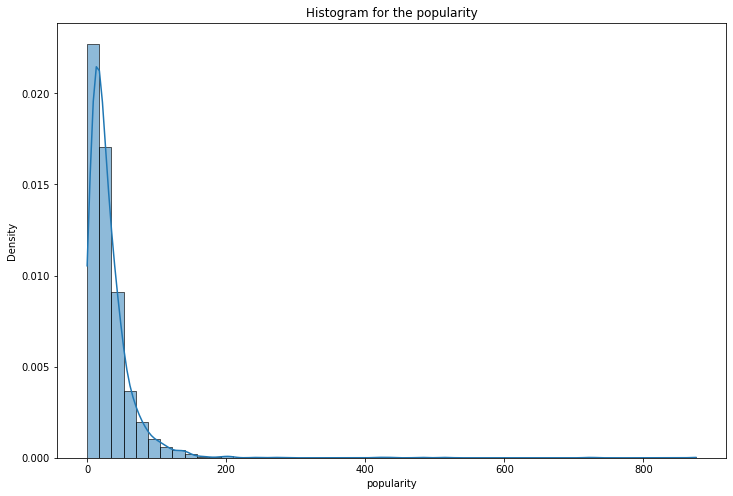

In [25]:
ax = sns.histplot(tmdb.popularity, bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the popularity")
ax.figure.set_size_inches(12,8)

Again, very close to a exponential. Now, let's analyze the runtime. Here, we will exclude those data will null values and also those where runtime = 0.

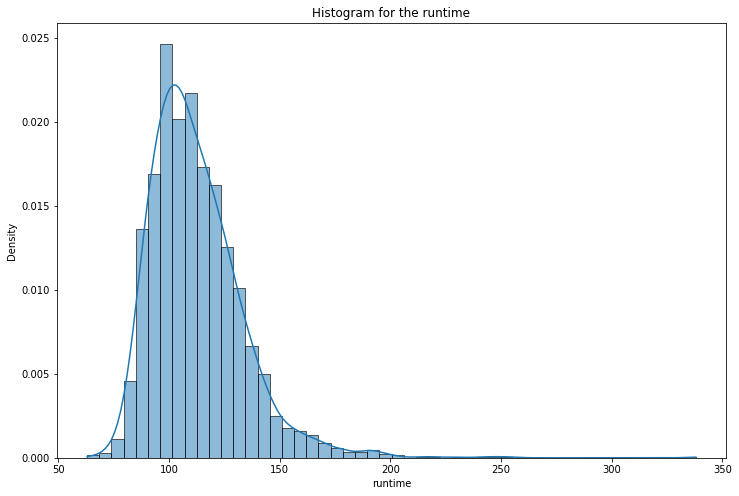

In [26]:
ax = sns.histplot(tmdb.query('runtime > 0').runtime.dropna( ), bins = 50, stat = 'density', kde = True)
ax.set_title("Histogram for the runtime")
ax.figure.set_size_inches(12,8)

This looks like right-skewed bell. Actually, it looks a lot like a Gumbel distribution:

https://en.wikipedia.org/wiki/Gumbel_distribution

# One-sample tests

So, from our sample, we can define some estimates for the populational parameters. For instance, using the dataset from movielens, we can get the estimate for the mean vote_average by:

In [27]:
mean_va_ml = movielens_agg.vote_average.mean( )
mean_va_ml

3.4438105717465843

Note that the mean is dependent on the sample size. Also, as we increase our sample, we are more confident in the estimate for the mean evaluated using the sample. 

As as example, we can evaluate the mean for an increasing number of samples (from 1 to $n$, where $n$ is the total number of sample). Let's evaluate this:

In [28]:
np.random.seed(75243)
va = movielens_agg.vote_average
temp = va.sample(frac = 1)

mean_list = [np.mean(temp[0:i]) for i in range(1, len(temp))]

Now, let's see how the mean value varies as we increase the number of samples.

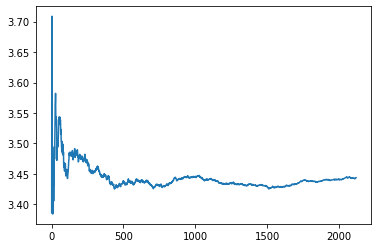

In [29]:
import matplotlib.pyplot as plt

plt.plot(mean_list)

When we have few observations, as we increase the number of samples, our mean varies **a lot**. When we have more than 1000 samples, our mean varies much less.

This shows that, as we evaluate a mean, we don't really know if this mean represents the real value (populational mean). In fact, it rarely shows us the exact populational mean. However, we can use some statistical tests to give us some confidence on our approach. 

Thus, let's draw a confidence interval for our mean. We can draw the confidence interval using:
\begin{equation}
\mu = \bar{x} \pm z \, \frac{s}{\sqrt{n}}
\end{equation}
Or we can simply use built-in function from Python libraries. Thus, considering a significance level of 5%:

In [30]:
from scipy.stats import norm

n = movielens_agg.vote_average.count( )
significance = 0.05
confidence = 1 - significance
mean_va_ml  = movielens_agg.vote_average.mean( )
sigma_va_ml = movielens_agg.vote_average.std( )/np.sqrt(n)

norm.interval(confidence, loc = mean_va_ml, scale = sigma_va_ml)

(3.4226681322185164, 3.4649530112746523)

Another function that does the same thing is:

In [31]:
from statsmodels.stats.weightstats import zconfint

zconfint(movielens_agg.vote_average)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(3.422668132218516, 3.464953011274652)

By default, this function already assumes $\alpha = 0.05$. Otherwise, we could have passed the *alpha* parameter, as in:

In [32]:
zconfint(movielens_agg.vote_average, alpha = 0.05)

(3.422668132218516, 3.464953011274652)

Note that, when we have few data points (usually less than 30), we usually need to employ the t-Student distribution. In this case, we could do:

In [33]:
from scipy.stats import t as t_student

dof = n - 1

t_student.interval(confidence, dof, loc = mean_va_ml, scale = sigma_va_ml)

(3.4226560546570117, 3.464965088836157)

Here, our interval using the t-Student distribution is very close to the Normal because we have a large sample.

## Z-test to one sample

Ok, let's try another thing: let's study each movie separately.

In [34]:
movies = pd.read_csv('movies.csv')

In this dataframe, we have the relation between movid Id and movie name. For instance:

In [35]:
movies.head( )

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Movie ID 1 refers to Toy Story, Movie ID 2 refers to Jumanji, and so on.

So, let's try to analyze the votes for Toy Story only:

In [36]:
ratings = pd.read_csv('ratings.csv')

ratings_1 = ratings.query('movieId == 1').rating

ratings_1

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: rating, Length: 215, dtype: float64

So, we have 215 observations. Drawing a histogram and a boxplot:

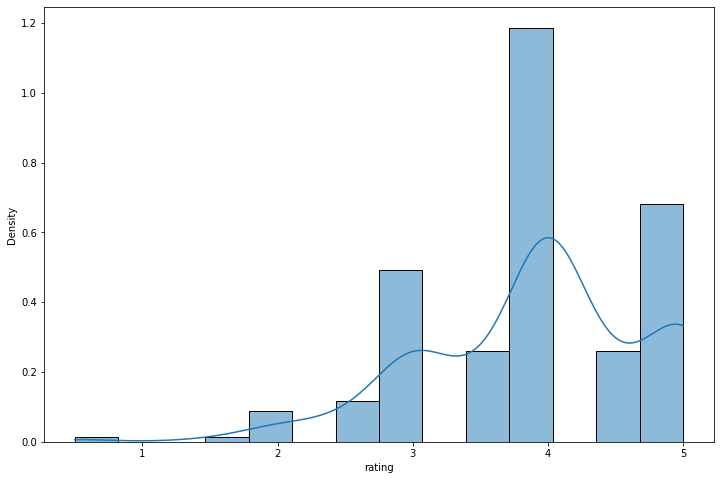

In [37]:
ax = sns.histplot(ratings_1, stat = 'density', kde = True)

ax.figure.set_size_inches(12,8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


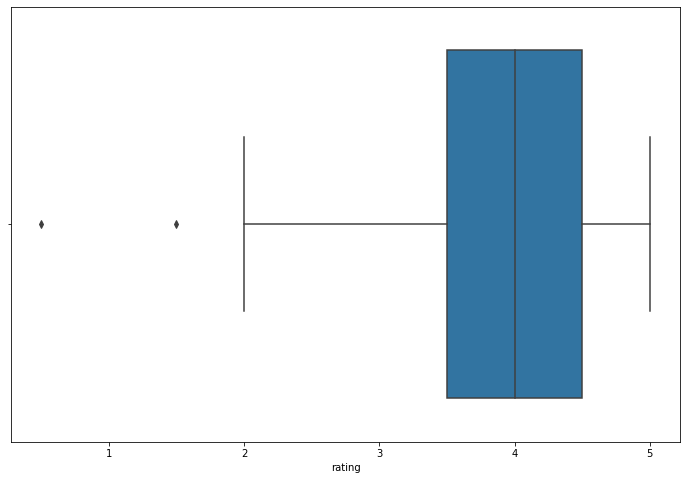

In [38]:
ax = sns.boxplot(ratings_1)

ax.figure.set_size_inches(12,8)

Note that the ratings from Toy Story seems to be higher than the grades overall. Let's draw the mean of each sample:

**Ratings of all movies**

In [39]:
ratings.rating.mean( )

3.501556983616962

**Ratings of Toy Story**

In [40]:
ratings_1.mean( )

3.9209302325581397

Indeed, ratings for Toy Story seem to be higher. However, how can will be more sure about this? 

Let's draw a confidence interval:

In [41]:
from scipy.stats import norm

mean_test = ratings_1.mean( )
std_test = ratings_1.std( )/np.sqrt(ratings_1.count( ))
significance = 0.05
confidence = 1 - significance

norm.interval(confidence, loc = mean_test, scale = std_test)

(3.8093359183563402, 4.032524546759939)

Note that the lower bound of the confidence interval is still higher than the average of all movies. However, this is still not a good way of performing this test.

The best way of doing this is to actually use a test of hypothesis:

\begin{equation}
H_0 : \mu = 3.50
\end{equation}

\begin{equation}
H_0 : \mu \neq 3.50
\end{equation}

where $\mu$ is the average for Toy Story. Here, $3.50$ refers to the average of all movies.

Now, we can do this using:

In [42]:
from statsmodels.stats.weightstats import ztest

ztest(x1 = ratings_1, value = ratings.rating.mean( ))

(7.365576551847334, 1.76382873572034e-13)

Here, since the p-value is lower than our test significance ($0.05$), we reject the null hypothesis. Thus, we say the populational mean of Toy Story ratings is not 3.50, considering a confidence level of 95%.

Now, let's see the graph for the mean rating for Toy Story as we increase the number of samples:

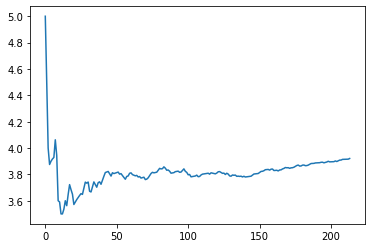

In [43]:
np.random.seed(75241)
temp = ratings_1.sample(frac = 1)

mean_list = [np.mean(temp[0:i]) for i in range(1, len(temp))]

plt.plot(mean_list)

Again, we see that the mean varies a lot in the start, but it soon stabilizes. Here, however, we still see that the mean is changing a little at the end.

But what happens to the z-test as we increase the number of samples:

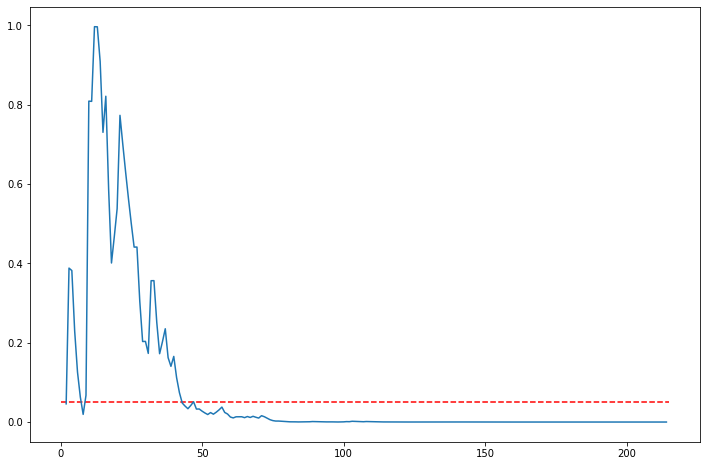

In [44]:
np.random.seed(75241)
temp = ratings_1.sample(frac = 1)

def get_ztest(i):
  stat, p = ztest(x1 = temp[0:i], value = ratings.rating.mean( ))
  return p

p_list = [get_ztest(i) for i in range(2, len(temp))]

ax = plt.plot(range(2, len(temp)), p_list)
ax = plt.hlines(y = 0.05, xmin = 0, xmax = len(temp), colors = 'r', linestyles = 'dashed')
ax.figure.set_size_inches(12,8)

Note that, for $n > 75$, our p-value actually changes very little. However, for lower $n$, it changes **a lot**. Actually, for $n < 50$, in many cases, the p-value is higher than 0.05, which would make us accept the null hypothesis (not enough evidence to reject the null hypothesis)!

So, it is very important to have an adequate sample size before making assumptions.

# Two-sample tests

Now that we saw how to use one-sample tests, let's see how to draw conclusions using two-sample tests, more specifically the test of difference between means.

Using *zconfint( )*, we can get the confidence interval for the difference between means of two samples. For instance, comparing the samples for Toy Story ratings and the ratings for all movies:

In [45]:
zconfint(ratings_1, ratings.rating)

(0.2799245129192442, 0.5588219849631111)

This is a confidence interval for the difference between means. Thus, with confidence of 95%, we can say that the average rating for Toy Story is 0.28 to 0.56 points higher than the average rating for all movies.

We can also draw conclusions using a Hypothesis Test. Let's consider a test where:

\begin{equation}
H_0 : \mu_1 - \mu_2 \leq 0.0
\end{equation}

\begin{equation}
H_1 : \mu_1 - \mu_2 > 0.0
\end{equation}
where $\mu_1$ is the average rating for Toy Story and $\mu_2$ is the average rating for the other movies. Let's evaluate the p-value:

In [46]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

toy_story = DescrStatsW(ratings_1)
all_movies = DescrStatsW(ratings.rating)

In [47]:
test = CompareMeans(toy_story, all_movies)

In [48]:
test.ztest_ind(alternative = "larger", value = 0)

(5.894327101501802, 1.8810563894414285e-09)

Since the p-value is lower than the test significance, we reject the null hypothesis!

We can also do the comparison between means using the t-Student distribution:

In [49]:
test.ttest_ind(alternative = "larger", value = 0)

(5.894327101501802, 1.887001569360886e-09, 101049.0)

To get a summary of the test, we can do:

In [50]:
test.summary(alpha = 0.05, use_t = True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.4194,0.071,5.894,0.000,0.280,0.559


## Visualizing our comparison between means

Nice! We have performed tests to compare our two samples. Now, let's try to visualize the difference between our data. First, let's draw a boxplot:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


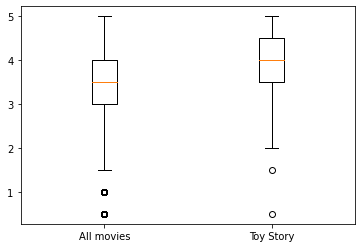

In [51]:
ax = plt.boxplot([ratings.rating, ratings_1], labels = ['All movies', 'Toy Story']);

Note that, indeed, looking at the boxplot, we can see that the ratings for Toy Story tend to be higher. However, it is hard to say that for sure (without doing the test).

Now, what could have happened if we only used 10 samples? Let's see:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


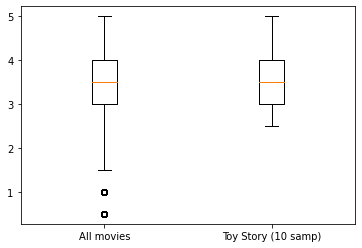

In [52]:
ratings_1_s = ratings_1[3:12]

ax = plt.boxplot([ratings.rating, ratings_1_s], labels = ['All movies', 'Toy Story (10 samp)']);

Note that, this time, the average for Toy Story ratings is very close to the average for the ratings of all movies, and the distribution is much more similar.

Let's try to do an statistical test on such sample:

In [53]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

toy_story_sample = DescrStatsW(ratings_1_s)
all_movies = DescrStatsW(ratings.rating)

test = CompareMeans(toy_story_sample, all_movies)

test.ztest_ind(alternative = "larger", value = 0)

(0.15538274341317088, 0.43825979384768665)

Note that, this time, our p-value is 0.438, which is higher than the test significance. Thus, we would wrongfully accept the null hypothesis.

Let's use a summary:

In [54]:
test.summary(use_t = False, alpha = 0.05)

,coef,std err,z,P>|z|,[0.025,0.975]
subset #1,0.0540,0.348,0.155,0.877,-0.627,0.735


Note that 0.0 is inside the confidence interval. Thus, it means that the difference between means can be equal to 0.0. In this case, we do not have sufficient elements to reject the hypothesis that the difference between means is not 0.0.

# Non-parametric tests

Non-parametric tests are used when we have few samples, or when we don't want to make the assumption that the distribution of data follows a Normal. Let's show how to make such tests.

First, let's compare three different movies:

In [56]:
movies.query("movieId in [1, 593, 72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


So, let's store the ratings in different variables and plot the boxplot:

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7fc8624fdb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc8624564d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc862375cd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc862375990>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc86274d690>,
  <matplotlib.lines.Line2D at 0x7fc862396210>]}

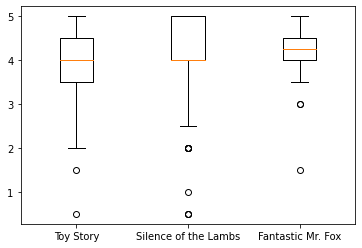

In [57]:
ratings1 = ratings.query("movieId == 1").rating
ratings593 = ratings.query("movieId == 593").rating
ratings72226 = ratings.query("movieId == 72226").rating

plt.boxplot([ratings1, ratings593, ratings72226], labels = ['Toy Story', 'Silence of the Lambs', 'Fantastic Mr. Fox'])

We note that there is a difference in the distribution of each set. Fantastic Mr. Fox seems to have a higher average vote. However, note that the number of votes is also very different: 

In [58]:
ratings1.count( )

215

In [59]:
ratings593.count( )

279

In [60]:
ratings72226.count( )

18

Thus, is the difference in average vote relevant? Let's use the test for comparison between means. Since we want to compare three movies, we have to use 3 tests (comparison between pairs).

In [64]:
test1 = DescrStatsW(ratings1)
test593 = DescrStatsW(ratings593)

test = CompareMeans(test1, test593)

test.ztest_ind(value = 0)

(-3.1318036206442246, 0.0017373604156636195)

So, we see that the distribution for ratings for Toy Story is different from the distribution for ratings for Silence of the Lambs ($p < 0.05$).

Now, let's perform the other comparisons. We will use a t-test, because the number of samples of Fantastic Mr. Fox is very low:

In [69]:
test593 = DescrStatsW(ratings593)
test72226 = DescrStatsW(ratings72226)

test = CompareMeans(test593, test72226)

test.ttest_ind(value = 0)

(0.3743094128349442, 0.7084430379183799, 295.0)

In [70]:
test1 = DescrStatsW(ratings1)
test72226 = DescrStatsW(ratings72226)

test = CompareMeans(test1, test72226)

test.ttest_ind(value = 0)

(-0.7884537463444344, 0.43123973285335726, 231.0)

Now, none of these achieved a $p < 0.05$, which means that the difference is not statistically relevant. That's interesting because, by only looking at the boxplot, we would have drawn a different conclusion.

When we have very few samples, it is safer to disregard the consideration that the samples follow a Normal distribution. Thus, we should use non-parametric tests.

To check for the normality, we can use the *normaltest( )*:

In [71]:
normaltest(ratings1)

NormaltestResult(statistic=18.220369223286593, pvalue=0.00011053430732728716)

In [72]:
normaltest(ratings593)

NormaltestResult(statistic=84.41684362031029, pvalue=4.667833086075242e-19)

In [73]:
normaltest(ratings72226)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=11.45006074215247, pvalue=0.003263254165930067)

Note that, for the first two movies (Toy Story and Silence of the Lambs), our p-value was lower than 0.05. Thus, we reject the hypothesis that these come from a Normal distribution.

For the Fantastic Mr. Fox movie, due to the number of samples, it even tells us that the test is only valid for $n > 20$. 

So, let's use a non-parametric test to compare the two distribution. Here, we will employ the Wilcoxon rank-sum test:

**This test should be used to compared independent samples.**

**This test should be used to compare two samples from continuous distributions. It does not handle ties between measurements in x and y.**

In [77]:
from scipy.stats import ranksums

ranksums(ratings1, ratings593)

RanksumsResult(statistic=-3.5930962013771377, pvalue=0.0003267718756440693)

Note that the p-value is lower than 0.05. Thus, we reject the null hypothesis that the distributions are the same. 